In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
from cnn_utils import *

%matplotlib inline
np.random.seed(1)

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

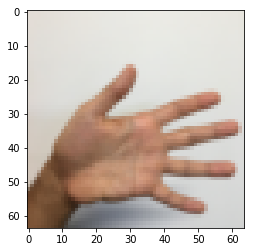

y = 5


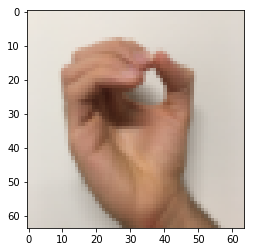

y = 0


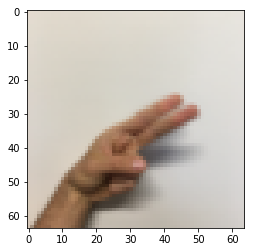

y = 2


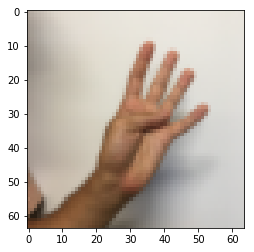

y = 4


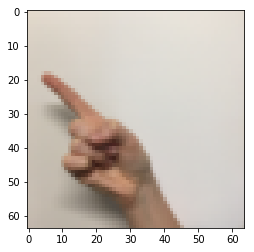

y = 1


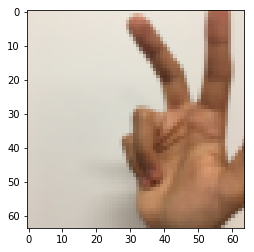

y = 3


In [3]:
check = 0
alredyShowed = []
index = 0
while (len(alredyShowed) <= 5):
    Y = Y_train_orig[:,index][0]
#     print Y
#     print alredyShowed
    if ((Y in alredyShowed)== False):
        plt.imshow(X_train_orig[index])
        plt.show()
        print ("y = " + str(np.squeeze(Y_train_orig[:, index])))
        alredyShowed.append(Y)
#         print index
    index = index + 1
        

    
    

In [4]:
Y_train_orig.shape

(1, 1080)

In [5]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
conv_layers = {}

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [6]:
def create_placeholder(n_H0,n_W0,n_C0,n_Y):
    X = tf.placeholder(tf.float32, shape = [None, n_H0, n_W0, n_C0])
    Y = tf.placeholder(tf.float32, shape = [None , n_Y])
    return X, Y

In [7]:
X , Y = create_placeholder(64,64,3,6)

In [8]:
print X
print Y

Tensor("Placeholder:0", shape=(?, 64, 64, 3), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 6), dtype=float32)


In [9]:
def initialize_parameter():
    tf.set_random_seed(1)
    
    W1 = tf.get_variable('W1', [4,4,3,8], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    
    W2 = tf.get_variable('W2', [2,2,8,16], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    
    parameters = {"W1" : W1,
                  "W2" : W2}
    return parameters

In [10]:
tf.reset_default_graph()
with tf.Session() as sess_test:
    parameters = initialize_parameter()
    init = tf.global_variables_initializer()
    sess_test.run(init)
    print ("W1 =" + str(parameters["W1"].eval()))
    print ("W2 =" + str(parameters["W2"].eval()))

W1 =[[[[ 0.11547081 -0.15562162  0.14463945 -0.12213563 -0.161331
     0.0167321   0.00137798  0.15687598]
   [ 0.06261188  0.15809353 -0.13944083  0.1304368   0.14947264
     0.07770665 -0.0344099   0.02789916]
   [ 0.1310067   0.03547595  0.1019934   0.17467071 -0.16157703
    -0.06069881 -0.10278072 -0.06633689]]

  [[-0.1701455  -0.15981087 -0.06383926 -0.00349012 -0.14234345
    -0.05761932  0.00821769 -0.07173218]
   [ 0.14097519  0.11141728  0.18437327  0.0588678  -0.13764857
    -0.11404216  0.05882488  0.09655331]
   [ 0.09364428 -0.03100704  0.16560768  0.14417745  0.15409656
    -0.08602516 -0.12028332 -0.16772161]]

  [[ 0.18019755 -0.17030357 -0.10018802 -0.18330556  0.03716455
    -0.09169444 -0.01606575 -0.10697315]
   [-0.1352132   0.04067522  0.07451691  0.02565144 -0.08935398
    -0.14955646  0.17125843 -0.10636543]
   [ 0.1641133  -0.16645104  0.14331098 -0.0984499  -0.02071032
    -0.13608913  0.15722917 -0.05736801]]

  [[ 0.18048044  0.12755601  0.09927674 -0.0789

In [11]:
def forward_propogation(X, parameters):
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    Z1 = tf.nn.conv2d(X, W1, strides=[1,1,1,1], padding='SAME')
    
    A1 = tf.nn.relu(Z1)
    
    P1 = tf.nn.max_pool(A1, ksize = [1, 8, 8, 1], strides= [1, 8, 8,1], padding= 'SAME')
    
    Z2 = tf.nn.conv2d(P1, W2, strides= [1, 1, 1, 1] , padding='SAME')
    
    A2 = tf.nn.relu(Z2)
    
    P2 = tf.nn.max_pool(A2, ksize= [1,4,4,1] , strides=[1, 4,4,1], padding = 'SAME')
    
    P = tf.contrib.layers.flatten(P2)
    
    Z3 = tf.contrib.layers.fully_connected(P, 6, activation_fn= None)
    
    return(Z3)
    

In [12]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    
    X , Y = create_placeholder(64, 64, 3 ,6)
    parameters = initialize_parameter()
    
    Z3 = forward_propogation(X, parameters)
    
    init = tf.global_variables_initializer()
    
    sess.run(init)
    
    a = sess.run(Z3, {X : np.random.randn(2, 64 , 64, 3), Y : np.random.randn(2,6)})
    
    print("Z3 = " + str(a))

Z3 = [[ 1.4416984  -0.24909666  5.450499   -0.2618962  -0.20669907  1.3654671 ]
 [ 1.4070846  -0.02573211  5.08928    -0.48669922 -0.40940708  1.2624859 ]]


In [13]:
def compute_cost(Z3, Y):
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Z3 , labels=Y))
    
    return(cost)

In [14]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholder(64, 64, 3, 6)
    parameters = initialize_parameter()
    
    Z3 = forward_propogation(X, parameters)
    cost = compute_cost(Z3, Y)
    init = tf.global_variables_initializer()
    
    sess.run(init)
    
    a = sess.run(cost, {X : np.random.randn(4, 64, 64, 3), Y : np.random.randn(4,6)})
    print("cost = " + str(a))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

cost = 4.6648693


In [26]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.009, num_epochs = 100, minibatch_size = 64, print_cost = True):
    ops.reset_default_graph()
    tf.set_random_seed(1)
    
    seed = 3
    (m , n_H0, n_W0, n_C0) = X_train.shape
    n_y = Y_train.shape[1]
    costs = []
    
    X , Y = create_placeholder(n_H0, n_W0, n_C0, n_y)
    
    parameters = initialize_parameter()
    
    Z3 = forward_propogation(X, parameters)
    
    cost = compute_cost(Z3, Y)
    
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        
        sess.run(init)
        
        for epoch in range(num_epochs):
            
            minibatch_cost = 0.
            
            num_minibatches = int(m / minibatch_size)
            
            seed = seed + 1
            
            minibatches = random_mini_batches(X_train, Y_train,minibatch_size, seed)
            
            for minibatch in minibatches:
                
                (minibatch_X , minibatch_Y) = minibatch
                
                
                _, temp_cost = sess.run([optimizer,cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                
                minibatch_cost += temp_cost / num_minibatches
                
            if print_cost == True and epoch % 5 == 0:
                print ("Cost after epoch %i: %f" % (epoch , minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel("iterations (per tens)")
        plt.title("Learning rate = " + str(learning_rate))
        plt.show()
        
        #Calculate the coreect predictions
        
        predict_op = tf.argmax(Z3, 1)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(accuracy)
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y:Y_test})
        
        print("Train Accuracy : ", train_accuracy)
        print("Test Accuracy : ", test_accuracy)
        
        return train_accuracy, test_accuracy, parameters

Cost after epoch 0: 1.921332
Cost after epoch 5: 1.904156
Cost after epoch 10: 1.904309
Cost after epoch 15: 1.904477
Cost after epoch 20: 1.901876
Cost after epoch 25: 1.784078
Cost after epoch 30: 1.681051
Cost after epoch 35: 1.618206
Cost after epoch 40: 1.597971
Cost after epoch 45: 1.566707
Cost after epoch 50: 1.554487
Cost after epoch 55: 1.502187
Cost after epoch 60: 1.461035
Cost after epoch 65: 1.304489
Cost after epoch 70: 1.201760
Cost after epoch 75: 1.163242
Cost after epoch 80: 1.102885
Cost after epoch 85: 1.087105
Cost after epoch 90: 1.051911
Cost after epoch 95: 1.018554


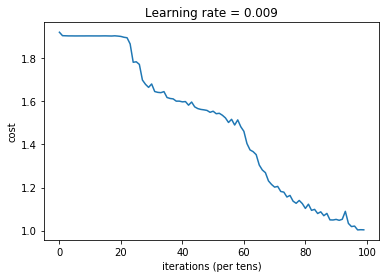

Tensor("Mean_1:0", shape=(), dtype=float32)
('Train Accuracy : ', 0.6666667)
('Test Accuracy : ', 0.5833333)


In [27]:
_,_,parameters = model(X_train, Y_train, X_test, Y_test)

Cost after epoch 0: 1.921332
Cost after epoch 5: 1.904156
Cost after epoch 10: 1.904309
Cost after epoch 15: 1.904477
Cost after epoch 20: 1.901876
Cost after epoch 25: 1.784078
Cost after epoch 30: 1.681051
Cost after epoch 35: 1.618206
Cost after epoch 40: 1.597971
Cost after epoch 45: 1.566707
Cost after epoch 50: 1.554487
Cost after epoch 55: 1.502187
Cost after epoch 60: 1.461035
Cost after epoch 65: 1.304489
Cost after epoch 70: 1.201760
Cost after epoch 75: 1.163242
Cost after epoch 80: 1.102885
Cost after epoch 85: 1.087105
Cost after epoch 90: 1.051911
Cost after epoch 95: 1.018554
Cost after epoch 100: 1.005099
Cost after epoch 105: 0.957182
Cost after epoch 110: 0.964193
Cost after epoch 115: 0.949561
Cost after epoch 120: 0.925645
Cost after epoch 125: 0.898527
Cost after epoch 130: 0.914478
Cost after epoch 135: 0.862254
Cost after epoch 140: 0.849145
Cost after epoch 145: 0.819312
Cost after epoch 150: 0.836543
Cost after epoch 155: 0.801438
Cost after epoch 160: 0.802415

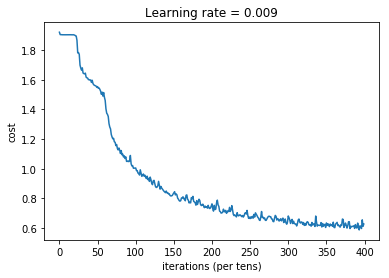

Tensor("Mean_1:0", shape=(), dtype=float32)
('Train Accuracy : ', 0.8064815)
('Test Accuracy : ', 0.65833336)


In [23]:
_,_,parameters = model(X_train, Y_train, X_test, Y_test , num_epochs= 400)